In [4]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import os

In [5]:
dataset_url = 'http://files.grouplens.org/datasets/movielens/ml-100k.zip'
dataset_file = 'ml-100k.zip'

In [6]:
if not os.path.exists('ml-100k'):
    print("Downloading the MovieLens 100K dataset...")
    urllib.request.urlretrieve(dataset_url, dataset_file)

    with zipfile.ZipFile(dataset_file, 'r') as zip_ref:
        zip_ref.extractall()

    print("Dataset downloaded and extracted.")
else:
    print("Dataset already exists.")

ratings_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=ratings_columns)

movies_columns = [
    'movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
    'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy',
    'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
    'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]
movies = pd.read_csv('ml-100k/u.item', sep='|', names=movies_columns, encoding='latin-1')


Dataset already exists.


In [7]:
ratings.shape

(100000, 4)

In [8]:
movies.head()

,movie_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [10]:
import random
import numpy as np
import torch
import torch.nn as nn

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    
    if torch.backends.mps.is_available():
        torch.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(21)

In [11]:
movies.head()

,movie_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
movies.iloc[:,5].sum()

2

In [12]:
movies.drop('unknown',axis=1,inplace=True)

In [13]:
movies.head()

,movie_id,title,release_date,video_release_date,IMDb_URL,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
data = pd.merge(ratings, movies[['movie_id', 'title']], on='movie_id')

Movie Embeddings

In [15]:
user_item_matrix = ratings.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)

In [16]:
user_item_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
just_values = user_item_matrix.values

In [18]:
user_ids = user_item_matrix.index.tolist()
movie_ids = user_item_matrix.columns.tolist()

In [19]:
from scipy.sparse.linalg import svds
k = 30
u, s, vt = svds(just_values, k=k)
movie_embeddings = vt.T
movie_embeddings_df = pd.DataFrame(movie_embeddings, index=movie_ids)

In [20]:
u.shape

(943, 30)

In [21]:
movie_titles = movies[['movie_id', 'title']].set_index('movie_id')
movie_embeddings_df = movie_embeddings_df.merge(movie_titles, left_index=True, right_index=True)

In [22]:
movie_embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,title
1,-0.050092,-0.070720,0.057914,-0.167188,0.055573,0.179237,0.101096,-0.051254,0.011378,-0.042497,...,-0.059133,0.022563,0.100893,0.109450,0.140506,0.016206,0.016974,0.087240,-0.095951,Toy Story (1995)
2,0.041408,-0.065828,-0.010789,-0.014007,-0.015497,0.033869,0.021270,-0.006072,-0.011960,-0.031156,...,0.075476,0.016240,0.000114,-0.016512,-0.040758,0.003234,0.062504,0.007025,-0.035180,GoldenEye (1995)
3,0.006256,0.008993,0.021547,0.008793,0.032223,-0.040396,-0.019791,0.004264,0.033179,-0.027349,...,-0.024282,0.020103,-0.002365,-0.031563,-0.004402,0.048801,0.011641,0.028618,-0.019929,Four Rooms (1995)
4,-0.014711,0.017505,0.001952,0.007089,-0.003948,-0.025234,-0.009804,0.026137,-0.041004,0.099838,...,0.051155,-0.029023,-0.007359,-0.047778,-0.038221,0.043000,0.026446,-0.013050,-0.059952,Get Shorty (1995)
5,0.005346,-0.018710,0.018682,-0.000664,-0.000691,0.008572,0.015376,-0.027261,0.003922,-0.035251,...,-0.019072,-0.000506,-0.049177,-0.032476,-0.015655,0.017901,0.026460,0.015311,-0.021607,Copycat (1995)


We can see how good our embeddings are here

In [22]:
!pip install scikit-learn

You should consider upgrading via the '/Users/sumanthkumar/Downloads/UB/fall-2024/RL/RL/rll/bin/python3 -m pip install --upgrade pip' command.


In [30]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_movies(movie_id, top_n=5):
    movie_embedding = movie_embeddings_df.loc[movie_id].values[:-1].reshape(1, -1)
    similarities = cosine_similarity(movie_embedding, movie_embeddings_df.iloc[:, :-1].values)[0]
    similar_indices = similarities.argsort()[-top_n-1:-1][::-1]
    similar_movie_ids = movie_embeddings_df.iloc[similar_indices].index.tolist()
    similar_movies = movie_embeddings_df.loc[similar_movie_ids]['title']
    return similar_movies
test_id=11
similar_movies = find_similar_movies(movie_id=test_id, top_n=5)
print("Movies similar to '{}':".format(movie_embeddings_df.loc[test_id]['title']))
print(similar_movies)


Movies similar to 'Seven (Se7en) (1995)':
22                     Braveheart (1995)
56                   Pulp Fiction (1994)
568                         Speed (1994)
96     Terminator 2: Judgment Day (1991)
92                   True Romance (1993)
Name: title, dtype: object


In [31]:
movie_embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,title
1,-0.050092,-0.070720,0.057914,-0.167188,0.055573,0.179237,0.101096,-0.051254,0.011378,-0.042497,...,-0.059133,0.022563,0.100893,0.109450,0.140506,0.016206,0.016974,0.087240,-0.095951,Toy Story (1995)
2,0.041408,-0.065828,-0.010789,-0.014007,-0.015497,0.033869,0.021270,-0.006072,-0.011960,-0.031156,...,0.075476,0.016240,0.000114,-0.016512,-0.040758,0.003234,0.062504,0.007025,-0.035180,GoldenEye (1995)
3,0.006256,0.008993,0.021547,0.008793,0.032223,-0.040396,-0.019791,0.004264,0.033179,-0.027349,...,-0.024282,0.020103,-0.002365,-0.031563,-0.004402,0.048801,0.011641,0.028618,-0.019929,Four Rooms (1995)
4,-0.014711,0.017505,0.001952,0.007089,-0.003948,-0.025234,-0.009804,0.026137,-0.041004,0.099838,...,0.051155,-0.029023,-0.007359,-0.047778,-0.038221,0.043000,0.026446,-0.013050,-0.059952,Get Shorty (1995)
5,0.005346,-0.018710,0.018682,-0.000664,-0.000691,0.008572,0.015376,-0.027261,0.003922,-0.035251,...,-0.019072,-0.000506,-0.049177,-0.032476,-0.015655,0.017901,0.026460,0.015311,-0.021607,Copycat (1995)


In [32]:
data.head()

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


Model

In [33]:
movie_embeddings_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,title
1,-0.050092,-0.070720,0.057914,-0.167188,0.055573,0.179237,0.101096,-0.051254,0.011378,-0.042497,...,-0.059133,0.022563,0.100893,0.109450,0.140506,0.016206,0.016974,0.087240,-0.095951,Toy Story (1995)
2,0.041408,-0.065828,-0.010789,-0.014007,-0.015497,0.033869,0.021270,-0.006072,-0.011960,-0.031156,...,0.075476,0.016240,0.000114,-0.016512,-0.040758,0.003234,0.062504,0.007025,-0.035180,GoldenEye (1995)


In [34]:
u.shape

(943, 30)

In [35]:
embedding_columns = [f'embedding_{i}' for i in range(1, k+1)]
user_embeddings_df = pd.DataFrame(u, index=user_ids, columns=embedding_columns)

In [36]:
user_embeddings_df.head()

,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,...,embedding_21,embedding_22,embedding_23,embedding_24,embedding_25,embedding_26,embedding_27,embedding_28,embedding_29,embedding_30
1,-0.084393,-0.069666,0.073559,0.038285,-0.003879,-0.010858,0.056133,-0.063440,-0.016476,-0.067243,...,0.016086,0.057236,-0.016895,0.084967,-0.017164,-0.014188,0.084347,0.006133,-0.005975,-0.065804
2,0.044548,-0.020689,0.026503,0.010522,0.039869,-0.009303,0.032842,-0.002063,-0.005892,0.009169,...,-0.004973,0.036543,-0.005823,0.017911,-0.005760,0.015467,-0.016282,-0.052579,0.046626,-0.014021
3,-0.039768,-0.000430,-0.023266,-0.016879,-0.014068,0.038100,0.018810,0.008538,0.009572,0.006868,...,-0.007054,-0.022341,-0.002515,0.004541,-0.003850,-0.044057,-0.028564,-0.023362,0.025618,-0.005658
4,-0.007140,-0.002614,-0.010646,0.001878,-0.010431,-0.012192,0.011924,0.019380,-0.007409,0.002103,...,0.008100,-0.020746,-0.007815,0.011004,0.012108,-0.025116,-0.019697,-0.012452,0.020698,-0.005993
5,0.051406,-0.022564,-0.023967,-0.002841,-0.037025,0.017671,0.027411,0.005176,0.051070,0.012413,...,0.022788,-0.012161,0.073727,0.095392,0.013383,-0.010518,0.014407,0.046131,-0.009159,-0.032747


In [37]:
movies.head()

,movie_id,title,release_date,video_release_date,IMDb_URL,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
!pip install gym

You should consider upgrading via the '/Users/sumanthkumar/Downloads/UB/fall-2024/RL/RL/rll/bin/python3 -m pip install --upgrade pip' command.


In [38]:
import gym

In [39]:
from gym import spaces


In [40]:
class MovieRecommenderEnv(gym.Env):
    def __init__(self, data, movie_embeddings_df, user_embeddings_df, movies_df):
        super(MovieRecommenderEnv, self).__init__()

        self.data = data 
        self.movie_embeddings_df = movie_embeddings_df  
        self.user_embeddings_df = user_embeddings_df 
        self.actual_emb=pd.DataFrame(columns=[f'embedding_{i}' for i in range(1, 49)]) 
        self.movies_df = movies_df  
        self.user_ids = self.data['user_id'].unique()
        self.num_users = len(self.user_ids)
        self.movie_ids = self.movie_embeddings_df.index.values
        self.num_movies = len(self.movie_ids)
        self.genres = [
            'Action', 'Adventure', 'Animation', "Children's", 'Comedy',
            'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
            'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
        ]
        self.num_genres = len(self.genres)

        self.embedding_dim = self.movie_embeddings_df.shape[1] - 1

        self.action_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(self.embedding_dim,), dtype=np.float32
        )
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(self.num_genres + self.embedding_dim,), dtype=np.float32
        )

        self.user_data = {}
        for user_id in sorted(self.user_ids):
            user_ratings = self.data[self.data['user_id'] == user_id]
            watched_movie_ids = user_ratings['movie_id'].values

            watched_embeddings = self.movie_embeddings_df.loc[watched_movie_ids].iloc[:, :-1].values
            avg_embedding = np.mean(watched_embeddings, axis=0) if len(watched_embeddings) > 0 else np.zeros(self.embedding_dim)

            genre_ratings = []
            for genre in self.genres:
                genre_movie_ids = self.movies_df[self.movies_df[genre] == 1]['movie_id'].values
                genre_user_ratings = user_ratings[user_ratings['movie_id'].isin(genre_movie_ids)]
                if len(genre_user_ratings) > 0:
                    avg_genre_rating = genre_user_ratings['rating'].mean()
                else:
                    avg_genre_rating = 0
                genre_ratings.append(avg_genre_rating)

            self.user_data[user_id] = {
                'watched_movie_ids': set(watched_movie_ids),
                'avg_embedding': avg_embedding,
                'avg_genre_ratings': np.array(genre_ratings),
                'user_embedding': self.user_embeddings_df.loc[user_id].values, 
                'actual_user_emb':np.concatenate((np.array(genre_ratings),avg_embedding))
            }
            self.actual_emb.loc[user_id]=self.user_data[user_id]['actual_user_emb']

        
        self.user_list = list(self.user_ids)
        self.current_user_index = -1 

        self.user_embeddings = self.user_embeddings_df.values 
        self.actual_emb_values=self.actual_emb.values
        self.user_id_to_index = {uid: idx for idx, uid in enumerate(self.actual_emb.index)}
        print('iiiii',self.actual_emb.index==self.user_embeddings_df.index)
        self.done = False

    def reset(self):

        self.current_user_index = 0

        self.current_user_id = self.user_list[self.current_user_index]
        user_info = self.user_data[self.current_user_id]

        # self.state = np.concatenate([user_info['avg_genre_ratings'], user_info['avg_embedding']]).astype(np.float32)
        self.state=np.concatenate([user_info['avg_genre_ratings'], user_info['avg_embedding']]).astype(np.float32)
        self.done=False
        return self.state


    def step(self, action):

        
        predicted_embedding = action 
        # print('ll1')
        user_info = self.user_data[self.current_user_id]
        watched_movie_ids = user_info['watched_movie_ids']
        # print('ll2',watched_movie_ids)
        unwatched_movie_ids = set(self.movie_ids) - watched_movie_ids
        unwatched_movie_embeddings = self.movie_embeddings_df.loc[list(unwatched_movie_ids)].iloc[:, :-1].values  
        unwatched_movie_ids_list = list(unwatched_movie_ids)
        # print('ll3')
        similarities = cosine_similarity(
            predicted_embedding.reshape(1, -1), unwatched_movie_embeddings
        )[0]
        
        top_indices = np.argsort(similarities)[-5:][::-1]
        recommended_movie_ids = [unwatched_movie_ids_list[idx] for idx in top_indices]

        
        # current_user_embedding = user_info['user_embedding'].reshape(1, -1)
        current_user_embedding=np.concatenate([user_info['avg_genre_ratings'], user_info['avg_embedding']]).astype(np.float32).reshape(1,-1)
        user_similarities = cosine_similarity(current_user_embedding, self.actual_emb_values)[0]
        user_similarities[self.current_user_index] = -1
        nearest_user_indices = np.argsort(user_similarities)[-10:]
        nearest_user_ids = [self.actual_emb.index[idx] for idx in nearest_user_indices]

        
        ground_truth_ratings = []
        rewards_listt=[]
        movie_pop=[]
        num_users_watched_this_movie=[]
        for movie_id in recommended_movie_ids:
            ratings_list = []
            for user_id in nearest_user_ids:
                rating_row = self.data[(self.data['user_id'] == user_id) & (self.data['movie_id'] == movie_id)]
                if not rating_row.empty:
                    ratings_list.append(rating_row['rating'].values[0])

            movie_pop.append(data[data['movie_id']==movie_id]['rating'].values.mean())
            num_users_watched_this_movie.append(data[data['movie_id']==movie_id]['rating'].values.shape[0])

            if ratings_list:
                avg_rating = np.mean(ratings_list)
            else:
                avg_rating = 0 
            ground_truth_ratings.append(avg_rating)

            if avg_rating>=3.5:
              rewards_listt.append(1)
            elif np.sum(np.where(np.array(movie_pop)>3,True,False))>3:
                rewards_listt.append(1)
            elif np.sum(np.where(np.array(num_users_watched_this_movie)>90,True,False))>3:
                rewards_listt.append(1)
            else:
              rewards_listt.append(-1)

        # print('ground_truth_ratings',ground_truth_ratings)
        reward=np.mean(rewards_listt)
        
        # avg_ground_truth_rating = np.mean(ground_truth_ratings)
        # # print('avg_ground_truth_rating',avg_ground_truth_rating)
        # if avg_ground_truth_rating > 2.5:
        #     reward = 1.0
        # else:
        #     reward = -1.0

        
        self.current_user_index += 1
        if self.current_user_index >= 900:
            # print('done true step func')
            self.done = True
            next_state = None 
        else:
            self.current_user_id = self.user_list[self.current_user_index]
            user_info = self.user_data[self.current_user_id]
            next_state = np.concatenate([user_info['avg_genre_ratings'], user_info['avg_embedding']]).astype(np.float32)
            # next_state=user_info['user_embedding'].reshape(1,-1)

        info = {}
        return next_state, reward, self.done, info

In [41]:
data.head()

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [32]:
data[data['movie_id']==242]['rating'].values.shape[0]

117

In [33]:
data[(data['user_id']==1) & (data['movie_id']==-1)]

,user_id,movie_id,rating,timestamp,title


In [42]:
deterministic_env1=MovieRecommenderEnv(data,movie_embeddings_df,user_embeddings_df,movies)

iiiii [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  T

In [35]:
np.all(deterministic_env1.actual_emb.index==deterministic_env1.user_embeddings_df.index)

True

In [36]:
deterministic_env1.user_embeddings_df.head()

,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,...,embedding_21,embedding_22,embedding_23,embedding_24,embedding_25,embedding_26,embedding_27,embedding_28,embedding_29,embedding_30
1,-0.084393,-0.069666,0.073559,0.038285,-0.003879,-0.010858,0.056133,-0.063440,-0.016476,-0.067243,...,0.016086,0.057236,-0.016895,0.084967,-0.017164,-0.014188,0.084347,0.006133,-0.005975,-0.065804
2,0.044548,-0.020689,0.026503,0.010522,0.039869,-0.009303,0.032842,-0.002063,-0.005892,0.009169,...,-0.004973,0.036543,-0.005823,0.017911,-0.005760,0.015467,-0.016282,-0.052579,0.046626,-0.014021
3,-0.039768,-0.000430,-0.023266,-0.016879,-0.014068,0.038100,0.018810,0.008538,0.009572,0.006868,...,-0.007054,-0.022341,-0.002515,0.004541,-0.003850,-0.044057,-0.028564,-0.023362,0.025618,-0.005658
4,-0.007140,-0.002614,-0.010646,0.001878,-0.010431,-0.012192,0.011924,0.019380,-0.007409,0.002103,...,0.008100,-0.020746,-0.007815,0.011004,0.012108,-0.025116,-0.019697,-0.012452,0.020698,-0.005993
5,0.051406,-0.022564,-0.023967,-0.002841,-0.037025,0.017671,0.027411,0.005176,0.051070,0.012413,...,0.022788,-0.012161,0.073727,0.095392,0.013383,-0.010518,0.014407,0.046131,-0.009159,-0.032747


In [37]:
deterministic_env1.actual_emb.head()

,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,...,embedding_39,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48
1,3.333333,2.928571,3.333333,2.200000,3.472527,3.440000,4.8,3.925234,3.5,5.0,...,0.002134,0.004226,0.000150,0.007363,-0.004750,-0.002421,0.009689,0.004369,0.000111,-0.039238
2,3.800000,4.333333,4.000000,3.000000,3.812500,3.777778,0.0,3.828571,3.0,4.5,...,-0.001687,0.013336,-0.000832,0.007796,-0.004451,0.008500,-0.012886,-0.045374,0.049234,-0.036604
3,2.785714,3.500000,0.000000,0.000000,2.583333,3.000000,5.0,2.909091,0.0,2.5,...,-0.000268,-0.015951,-0.001304,0.002475,-0.003036,-0.044836,-0.030700,-0.033026,0.043277,-0.023257
4,3.875000,3.500000,0.000000,0.000000,5.000000,4.750000,5.0,4.500000,0.0,0.0,...,0.007625,-0.021627,-0.009106,0.011098,0.015921,-0.039204,-0.029183,-0.022504,0.047115,-0.037443
5,3.142857,3.242424,3.785714,2.448276,3.000000,3.888889,0.0,2.666667,2.5,5.0,...,0.006225,-0.004364,0.015425,0.015570,-0.002612,-0.002073,-0.000270,0.020115,-0.002947,-0.035651


In [38]:
deterministic_env1.actual_emb.head()

,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,...,embedding_39,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48
1,3.333333,2.928571,3.333333,2.200000,3.472527,3.440000,4.8,3.925234,3.5,5.0,...,0.002134,0.004226,0.000150,0.007363,-0.004750,-0.002421,0.009689,0.004369,0.000111,-0.039238
2,3.800000,4.333333,4.000000,3.000000,3.812500,3.777778,0.0,3.828571,3.0,4.5,...,-0.001687,0.013336,-0.000832,0.007796,-0.004451,0.008500,-0.012886,-0.045374,0.049234,-0.036604
3,2.785714,3.500000,0.000000,0.000000,2.583333,3.000000,5.0,2.909091,0.0,2.5,...,-0.000268,-0.015951,-0.001304,0.002475,-0.003036,-0.044836,-0.030700,-0.033026,0.043277,-0.023257
4,3.875000,3.500000,0.000000,0.000000,5.000000,4.750000,5.0,4.500000,0.0,0.0,...,0.007625,-0.021627,-0.009106,0.011098,0.015921,-0.039204,-0.029183,-0.022504,0.047115,-0.037443
5,3.142857,3.242424,3.785714,2.448276,3.000000,3.888889,0.0,2.666667,2.5,5.0,...,0.006225,-0.004364,0.015425,0.015570,-0.002612,-0.002073,-0.000270,0.020115,-0.002947,-0.035651


In [39]:
deterministic_env1.reset()

array([ 1.6666666e+00,  2.5000000e+00,  0.0000000e+00,  4.0000000e+00,
        3.5625000e+00,  0.0000000e+00,  4.0000000e+00,  4.0909090e+00,
        4.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  3.5454545e+00,  3.0000000e+00,  0.0000000e+00,
        3.0000000e+00,  0.0000000e+00,  4.3618320e-03, -5.3900067e-04,
        1.5694499e-02,  2.7340886e-03,  6.6843200e-03, -1.7144816e-02,
        3.7280035e-03,  7.3603378e-03,  2.7975277e-04, -4.0279562e-04,
        7.1408099e-04,  5.1209005e-03,  2.5445167e-03,  6.3048778e-03,
        2.3002375e-04,  5.8945445e-03, -1.1740012e-02, -4.3875602e-04,
        3.0738337e-02, -2.5366561e-02, -1.0860557e-02,  3.7294505e-03,
        1.0024704e-03,  2.7366379e-02, -3.2517996e-02,  1.5592947e-02,
        2.9191593e-04, -1.6361136e-02,  6.8374281e-03, -3.7639473e-02],
      dtype=float32)

In [40]:
deterministic_env1.step(np.random.rand(1,30))

(array([ 2.8000000e+00,  2.8750000e+00,  2.5999999e+00,  2.2500000e+00,
         3.2580645e+00,  2.7500000e+00,  5.0000000e+00,  3.2380953e+00,
         0.0000000e+00,  3.0000000e+00,  3.0000000e+00,  2.0000000e+00,
         3.0000000e+00,  3.4210527e+00,  3.2500000e+00,  2.7619047e+00,
         3.2000000e+00,  0.0000000e+00,  4.8265876e-03,  7.5732579e-04,
         1.9976425e-04, -1.7381767e-03, -2.4549630e-03, -6.9720526e-03,
         3.3746019e-03,  5.5240043e-03, -3.0298813e-04, -9.8857712e-03,
        -1.3121538e-03,  9.6638370e-03,  9.4598290e-03,  2.3566012e-03,
         6.3437894e-03, -1.0655671e-02,  2.3920748e-03, -2.1293352e-03,
         8.8166496e-05, -1.0471323e-02,  3.5616644e-03,  2.2003322e-03,
         9.6421763e-03,  9.3533238e-03,  4.7368906e-04,  1.5488200e-02,
         6.2588360e-03, -2.7664976e-02,  4.2964488e-02, -3.4805804e-02],
       dtype=float32),
 -1.0,
 False,
 {})

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque

In [44]:
device='mps'

In [45]:
class Actor(nn.Module):
    def __init__(self, user_embedding_dim, movie_embedding_dim):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(user_embedding_dim, 128)
        self.fc2 = nn.Linear(128, 512)
        self.fc2_1 = nn.Linear(512, 1024)
        # self.fc2_2 = nn.Linear(512, 1024)
        self.fc2_3 = nn.Linear(1024, 2048)
        self.fc2_4 = nn.Linear(2048, 2048)
        self.fc3 = nn.Linear(2048, movie_embedding_dim)  

    def forward(self, user_embedding):
        x = torch.relu(self.fc1(user_embedding))
        x = self.fc2_4(torch.relu(self.fc2_3(torch.relu(torch.relu(self.fc2_1(torch.relu(self.fc2(x))))))))
        movie_embedding = self.fc3(x)  
        return movie_embedding

class Critic(nn.Module):
    def __init__(self, user_embedding_dim, movie_embedding_dim):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(user_embedding_dim + movie_embedding_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc2_1 = nn.Linear(256, 512)
        self.fc2_2=nn.Linear(512,1024)
        self.fc2_4=nn.Linear(1024,64)
        self.fc3 = nn.Linear(64, 1)  

    def forward(self, user_embedding, movie_embedding):
        x = torch.relu(self.fc1(torch.cat([user_embedding, movie_embedding], dim=-1)))
        x = self.fc2_4(torch.relu(self.fc2_2(torch.relu(self.fc2_1(torch.relu(self.fc2(x)))))))
        q_value = self.fc3(x)
        return q_value

In [46]:
user_embedding_dim = 48
movie_embedding_dim = 30

In [47]:
actor1=Actor(user_embedding_dim, movie_embedding_dim).to(device)
critic1=Critic(user_embedding_dim, movie_embedding_dim).to(device)

actor2=Actor(user_embedding_dim, movie_embedding_dim).to(device)
critic2=Critic(user_embedding_dim, movie_embedding_dim).to(device)

In [48]:
actor1.load_state_dict(torch.load('actor1_new_arc.pth'))
actor2.load_state_dict(torch.load('target_actor1_new_arc.pth'))
critic1.load_state_dict(torch.load('critic1_new_arc.pth'))
critic2.load_state_dict(torch.load('target_critic_new_arc.pth'))

<All keys matched successfully>

In [49]:
actor1=actor1.to(device)
actor2=actor2.to(device)
critic1=critic1.to(device)
critic2=critic2.to(device)

In [48]:
class DDPGAgent:
    def __init__(self,actor_lr=1e-4, critic_lr=1e-3, tau=0.5, buffer_size=100000, batch_size=64):
        self.actor = actor1
        self.critic = critic1
        self.target_actor = actor2
        self.target_critic = critic2
        self.target_actor.load_state_dict(self.actor.state_dict())
        self.target_critic.load_state_dict(self.critic.state_dict())
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=actor_lr)
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=critic_lr)
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.tau = tau      
        self.rewards_per_episode=[]

    def select_action(self, state, noise_factor=0.1):
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        action = self.actor(state_tensor.to(device)).detach().cpu().numpy()[0]
        action += noise_factor * np.random.randn(*action.shape)
        return np.clip(action, -1.0, 1.0)

    def store_experience(self, state, action, reward):
        self.memory.append((state, action, reward))

    def sample_from_memory(self):
        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards = zip(*batch)
        return torch.tensor(states, dtype=torch.float32), torch.tensor(actions, dtype=torch.float32), torch.tensor(rewards, dtype=torch.float32)

    def update_critic(self, states, actions, rewards):
        q_values = self.critic(states.to(device), actions.to(device))
        loss = torch.mean((q_values - rewards.to(device)) ** 2)
        self.critic_optimizer.zero_grad()
        loss.backward()
        self.critic_optimizer.step()

    def update_actor(self, states):
        actions = self.actor(states.to(device))
        q_values = self.critic(states.to(device), actions.to(device))
        actor_loss = -torch.mean(q_values)
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

    def soft_update_target_networks(self):
        for target_param, param in zip(self.target_actor.parameters(), self.actor.parameters()):
            target_param.data.copy_((1.0 - self.tau) * target_param.data + self.tau * param.data)
        for target_param, param in zip(self.target_critic.parameters(), self.critic.parameters()):
            target_param.data.copy_((1.0 - self.tau) * target_param.data + self.tau * param.data)

    def train(self, env, num_episodes=150, noise_factor=0.2):
        # print('in ttt')
        best_reward=0.24
        for episode in range(num_episodes):
            state = env.reset()
            total_reward = 0
            done = False
            ts=0
            while not done:
                action = self.select_action(state, noise_factor=noise_factor)
                ts=ts+1
                next_state, reward, done, _ = env.step(action)
                # print('hereeeee')
                if done:
                  # print(next_state)
                  break

                self.store_experience(state, action, reward)

                if len(self.memory) >= self.batch_size:
                    states, actions, rewards = self.sample_from_memory()


                    self.update_critic(states, actions, rewards)
                    self.update_actor(states)

                    self.soft_update_target_networks()

                total_reward += reward
                state = next_state
            avg_rewards=total_reward/ts
            self.rewards_per_episode.append(avg_rewards)
            if avg_rewards>best_reward:
                torch.save(actor1.state_dict(), 'actor1_new_arc.pth')
                torch.save(actor2.state_dict(), 'target_actor1_new_arc.pth')
                torch.save(critic1.state_dict(), 'critic1_new_arc.pth')
                torch.save(critic2.state_dict(), 'target_critic_new_arc.pth')
                best_reward=avg_rewards

            print(f"Episode {episode+1}/{num_episodes}, Total Reward: {total_reward/ts}")

In [49]:
ddpg_agent = DDPGAgent()

In [50]:
import matplotlib.pyplot as plt

In [ ]:
ddpg_agent.train(deterministic_env1)

Episode 1/150, Total Reward: -0.13207209614401946
Episode 2/150, Total Reward: -0.11740954005615956
Episode 3/150, Total Reward: -0.12655906071491832
Episode 4/150, Total Reward: -0.1609152092510598
Episode 5/150, Total Reward: -0.1459575008771733
Episode 6/150, Total Reward: -0.17041219885562672
Episode 7/150, Total Reward: -0.14106479653041132
Episode 8/150, Total Reward: -0.18308996504235087
Episode 9/150, Total Reward: -0.20822512651991554
Episode 10/150, Total Reward: -0.22458099798751632
Episode 11/150, Total Reward: -0.21961479646789422
Episode 12/150, Total Reward: -0.21370077879811322
Episode 13/150, Total Reward: -0.1890300952248567
Episode 14/150, Total Reward: -0.15828776390240473
Episode 15/150, Total Reward: -0.20126216171929334
Episode 16/150, Total Reward: -0.2388489981967448
Episode 17/150, Total Reward: -0.22196009647573475
Episode 18/150, Total Reward: -0.19751486564685994
Episode 19/150, Total Reward: -0.19321721157881522
Episode 20/150, Total Reward: -0.18993240337

#### There is still room for improvement as the model has high variance , possible improvements would be to use a better reward structure , more data and better embedidngs , usage of replay buffer

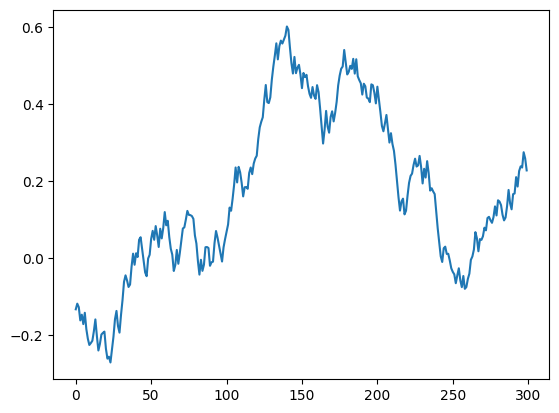

In [67]:
plt.plot([i for i in range(len(ddpg_agent.rewards_per_episode))],ddpg_agent.rewards_per_episode)

In [50]:
loaded_actor=Actor(48,30)
loaded_actor.load_state_dict(torch.load('actor1_new_arc.pth'))
loaded_actor=loaded_actor.to(device)

In [51]:
random_user_id=np.random.choice(ratings['user_id'].values)
print(random_user_id)
def testModelsPerformance(rand_user_id):
    def findRandomUsersMostWatchedAndLikedGenre(rand_user_id):
        return movies[movies.movie_id.isin(ratings[ratings.user_id==rand_user_id].movie_id.values)].loc[:,'Action':'Western'].sum(axis=0).sort_values(ascending=False).index[:3]
    users_fav_genre=findRandomUsersMostWatchedAndLikedGenre(rand_user_id)
    rand_user_id_embeddings=deterministic_env1.user_data[rand_user_id]
    predicted_mov_embeddings=loaded_actor(torch.tensor(rand_user_id_embeddings['actual_user_emb'],dtype=torch.float32).to(device))
    def find_similar_movies(movie_embedding, top_n=5):
    # movie_embedding = movie_embeddings_df.loc[movie_id].values[:-1].reshape(1, -1)
        similarities = cosine_similarity(movie_embedding, movie_embeddings_df.iloc[:, :-1].values)[0]
        similar_indices = similarities.argsort()[-top_n-1:-1][::-1]
        similar_movie_ids = movie_embeddings_df.iloc[similar_indices].index.tolist()
        similar_movies = movie_embeddings_df.loc[similar_movie_ids]['title']
        return similar_movies
    similar_movies = find_similar_movies(predicted_mov_embeddings.reshape(1,-1).detach().cpu().numpy(), top_n=5)
    return users_fav_genre, movies[movies.movie_id.isin(similar_movies.index)].loc[:,['title']+list(users_fav_genre.values)]

testModelsPerformance(random_user_id)

830


(Index(['Action', 'Comedy', 'Drama'], dtype='object'),
                                   title  Action  Comedy  Drama
 191                  Raging Bull (1980)       0       0      1
 460                        Smoke (1995)       0       0      1
 517            Miller's Crossing (1990)       0       0      1
 641                Grifters, The (1990)       0       0      1
 648  Once Upon a Time in America (1984)       0       0      1)

Reward for users 900-940 , test set

In [84]:
deterministic_env1.actual_emb.head()

,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,...,embedding_39,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48
1,3.333333,2.928571,3.333333,2.200000,3.472527,3.440000,4.8,3.925234,3.5,5.0,...,-0.002134,0.004226,-0.000150,-0.007363,0.004750,-0.002421,0.009689,0.004369,0.000111,0.039238
2,3.800000,4.333333,4.000000,3.000000,3.812500,3.777778,0.0,3.828571,3.0,4.5,...,0.001687,0.013336,0.000832,-0.007796,0.004451,0.008500,-0.012886,-0.045374,0.049234,0.036604
3,2.785714,3.500000,0.000000,0.000000,2.583333,3.000000,5.0,2.909091,0.0,2.5,...,0.000268,-0.015951,0.001304,-0.002475,0.003036,-0.044836,-0.030700,-0.033026,0.043277,0.023257
4,3.875000,3.500000,0.000000,0.000000,5.000000,4.750000,5.0,4.500000,0.0,0.0,...,-0.007625,-0.021627,0.009106,-0.011098,-0.015921,-0.039204,-0.029183,-0.022504,0.047115,0.037443
5,3.142857,3.242424,3.785714,2.448276,3.000000,3.888889,0.0,2.666667,2.5,5.0,...,-0.006225,-0.004364,-0.015425,-0.015570,0.002612,-0.002073,-0.000270,0.020115,-0.002947,0.035651


In [52]:
loaded_actor.eval()
test_user=[i for i in range(900,940)]
total_rewards=[]
for user in list(set(test_user)):
    user_embds=deterministic_env1.actual_emb.loc[user,:].values
    with torch.no_grad():
        watched_movie_ids=ratings[ratings.user_id==user].movie_id.values
        predicted_for_test_user_mov_embd=loaded_actor(torch.tensor(user_embds,dtype=torch.float32).reshape(1,-1).to(device))
        unwatched_movie_ids = list(set(deterministic_env1.movie_ids) - set(watched_movie_ids))
        similarities=cosine_similarity(predicted_for_test_user_mov_embd.detach().cpu().numpy().reshape(1,-1),deterministic_env1.movie_embeddings_df.loc[list(unwatched_movie_ids)].iloc[:, :-1].values)[0]
        top_indices = np.argsort(similarities)[-5:][::-1]
        recommended_movie_ids = [unwatched_movie_ids[idx] for idx in top_indices]
        user_similarities = cosine_similarity(user_embds.reshape(1,-1), deterministic_env1.actual_emb_values)[0]
        user_similarities[user-1]=-1
        nearest_user_indices = np.argsort(user_similarities)[-10:]
        nearest_user_ids = [deterministic_env1.actual_emb.index[idx] for idx in nearest_user_indices]
        ground_truth_ratings = []
        rewards_listt=[]
        movie_pop=[]
        num_users_watched_this_movie=[]
        for movie_id in recommended_movie_ids:
            ratings_list = []
            for user_id in nearest_user_ids:
                rating_row = ratings[(ratings.user_id==user_id)&(ratings.movie_id==movie_id)]
                if not rating_row.empty:
                    ratings_list.append(rating_row['rating'].values[0])
            movie_pop.append(ratings[ratings.movie_id==movie_id]['rating'].values.mean())
            num_users_watched_this_movie.append(ratings[ratings.movie_id==movie_id]['rating'].values.shape[0])

            if ratings_list:
                avg_rating = np.mean(ratings_list)
            else:
                avg_rating = 0 
            ground_truth_ratings.append(avg_rating)

            if avg_rating>=3:
              rewards_listt.append(1)
            elif np.sum(np.where(np.array(movie_pop)>=3,True,False))>3:
                rewards_listt.append(1)
            elif np.sum(np.where(np.array(num_users_watched_this_movie)>=90,True,False))>3:
                rewards_listt.append(1)
            else:
                rewards_listt.append(-1)        

    total_rewards.append(np.mean(rewards_listt))    
print(np.mean(total_rewards))

0.32


## Plot of rewards it got on the test users, high variance , implies there still is room for improvement

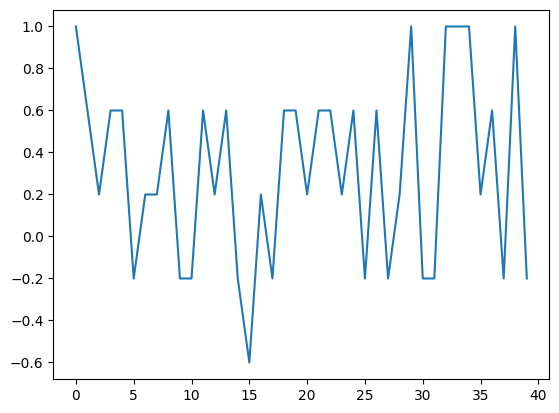

In [57]:
# we only have 40 users in test set , in training we used 900 , an average of 0.32
plt.plot([i for i in range(len(total_rewards))],total_rewards)